In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import GridSearchCV

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# reading the dataset
train = pd.read_csv("Training_Set.csv")
train.head()

,Attribute 1 (a1),Attribute 2 (a2),Class Label
0,2,11,2
1,2,13,2
2,2,15,2
3,2,27,1
4,2,39,1


In [3]:
#checking size of dataset
train.shape

(30, 3)

In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 3 columns):
Attribute 1 (a1)    30 non-null int64
Attribute 2 (a2)    30 non-null int64
Class Label         30 non-null int64
dtypes: int64(3)
memory usage: 848.0 bytes


In [5]:
#finding number of null values in a column
train.isnull().sum()

Attribute 1 (a1)    0
Attribute 2 (a2)    0
Class Label         0
dtype: int64

In [6]:
# splitting the training data into x and y
y = train['Class Label']
x = train.drop(columns = 'Class Label')

In [7]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [8]:
# reading the dataset
valid = pd.read_csv("Validation_Set.csv")
valid.head()

,Attribute 1 (a1),Attribute 2 (a2),True Class Label,Class Label as predicted by the decision tree,Unnamed: 4,Unnamed: 5,Unnamed: 6
0,2,35,1,1,NaN,NaN,NaN
1,12,13,2,1,NaN,NaN,NaN
2,-4,45,2,2,NaN,NaN,NaN
3,2,17,2,2,NaN,NaN,NaN


In [9]:
valid=valid.drop(columns = ['Unnamed: 4','Unnamed: 5','Unnamed: 6'],axis=1)

In [10]:
valid.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 4 columns):
Attribute 1 (a1)                                 4 non-null int64
Attribute 2 (a2)                                 4 non-null int64
True Class Label                                 4 non-null int64
Class Label as predicted by the decision tree    4 non-null int64
dtypes: int64(4)
memory usage: 256.0 bytes


In [11]:
# splitting the validating data into x and y
y_test = valid['True Class Label']
x_test = valid.drop(columns = ['True Class Label','Class Label as predicted by the decision tree'])

In [12]:
y_test.head()

0    1
1    2
2    2
3    2
Name: True Class Label, dtype: int64

In [13]:
x_test.head()

,Attribute 1 (a1),Attribute 2 (a2)
0,2,35
1,12,13
2,-4,45
3,2,17


In [14]:
#predicting on model using validation set
y_pred = model.predict(x_test)
y_pred

array([1, 1, 1, 2], dtype=int64)

In [15]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score

In [16]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.33      1.00      0.50         1
           2       1.00      0.33      0.50         3

    accuracy                           0.50         4
   macro avg       0.67      0.67      0.50         4
weighted avg       0.83      0.50      0.50         4



In [17]:
print(confusion_matrix(y_test,y_pred))
print("Accuracy:",accuracy_score(y_test,y_pred))

[[1 0]
 [2 1]]
Accuracy: 0.5


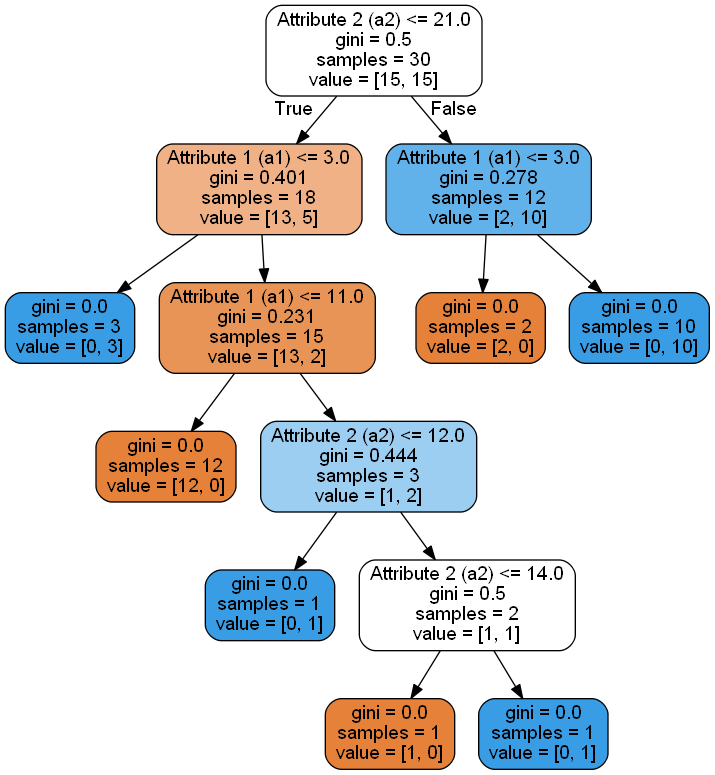

In [18]:
#plotting tree
from IPython.display import Image
from sklearn.externals.six import StringIO
from sklearn.tree import export_graphviz
import pydotplus,graphviz
features = list(train.columns[:2])
dot_data = StringIO()
export_graphviz(model , out_file=dot_data,
               feature_names = features, filled = True,rounded = True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())

In [19]:
# GridSearchCV to find optimal max_depth
from sklearn.model_selection import KFold

params = {
    'max_depth':range(3,21),
    'min_samples_leaf' : range(1,5),
    'min_samples_split' : range(2,12),
    'criterion':['gini']
}
fold = 5

In [20]:
tree = DecisionTreeClassifier()
grid_model = GridSearchCV(estimator=tree , param_grid=params ,
                          cv=fold , verbose=1 )

In [21]:
grid_model.fit(x,y)

Fitting 5 folds for each of 720 candidates, totalling 3600 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 3600 out of 3600 | elapsed:   12.4s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=None,
             param_grid={'criterion': ['gini'], 'max_depth': range(3, 21),
                         'min_samples_leaf': range(1, 5),
   

In [22]:
print(grid_model.best_estimator_)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')


In [23]:
final_model = DecisionTreeClassifier(criterion='gini',
                                       random_state = 100 , 
                                       max_depth= 3,
                                       min_samples_leaf=1,
                                       min_samples_split=10)

final_model.fit(x,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=100, splitter='best')

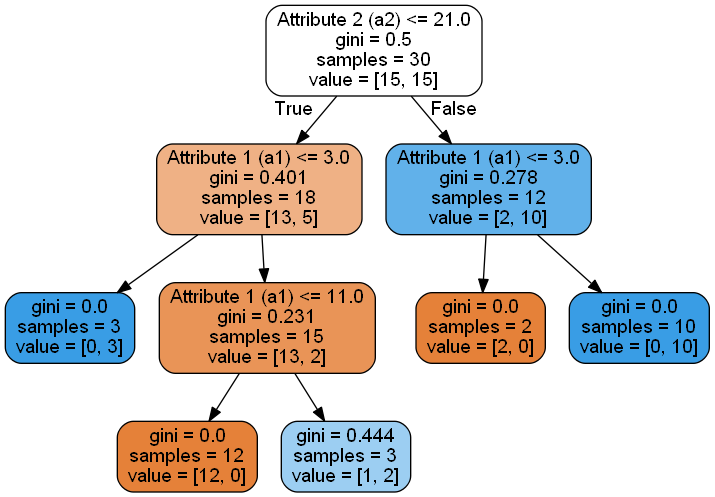

In [24]:
# plotting the tree
dot_data = StringIO()  
export_graphviz(final_model, out_file=dot_data,feature_names=features,filled=True,rounded=True)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(graph.create_png())

In [25]:
#optimised model prdeiction
y_pred = final_model.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           1       0.50      1.00      0.67         1
           2       1.00      0.67      0.80         3

    accuracy                           0.75         4
   macro avg       0.75      0.83      0.73         4
weighted avg       0.88      0.75      0.77         4



In [26]:
#final accuracy
print("Accuracy:",accuracy_score(y_test,y_pred))

Accuracy: 0.75
